In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
movingaverages=[10,25,50]
mav_colors=['red','orange','green','skyblue','blue']
symbol = 'NVDA'

[*********************100%***********************]  1 of 1 completed

C:\Users\Wonyoung\AppData\Roaming\Python\Python310\site-packages\yfinance\utils.py:768: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


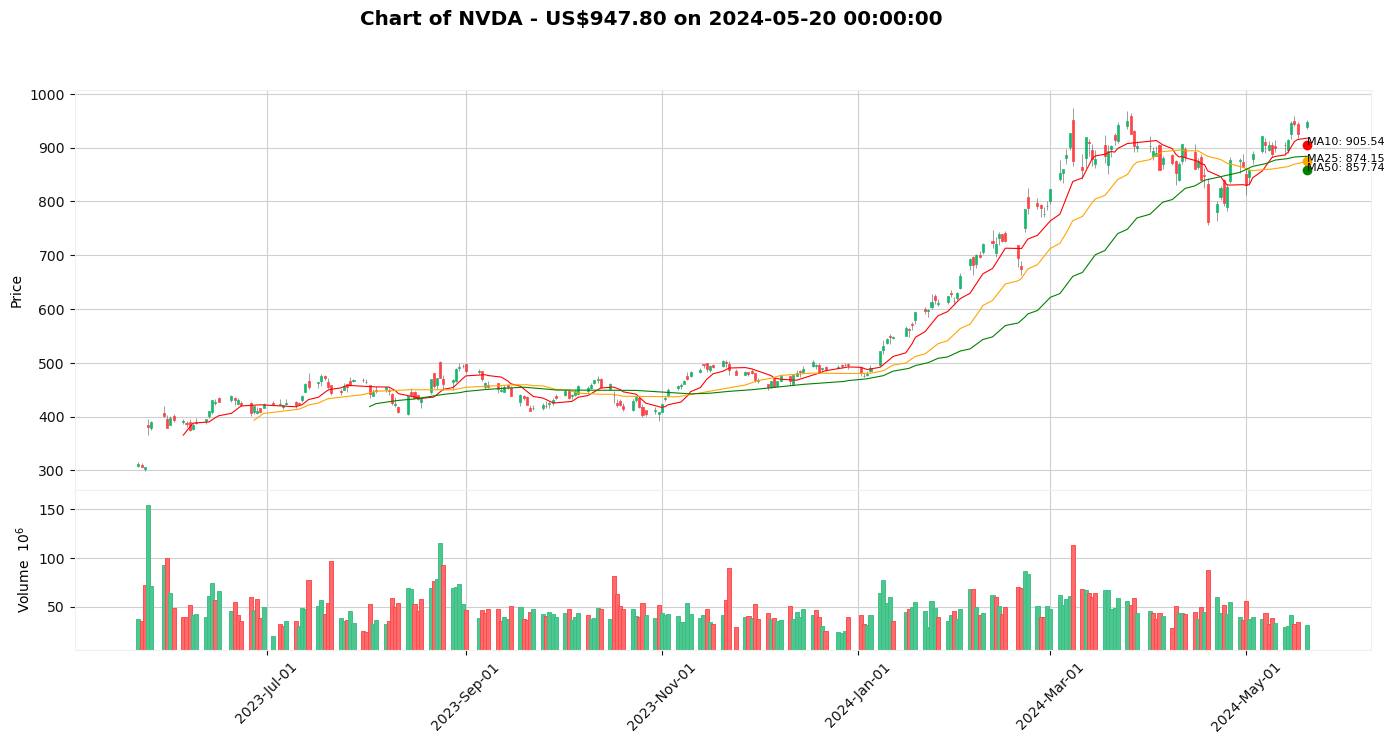

In [3]:
def plot_candlestick_with_moving_average(symbol):
    # Fetch historical data
    data = yf.download(symbol, period="1y")
    
    # customize the candlestick plot
    customstyle = mpf.make_mpf_style(base_mpf_style='yahoo',
                                 y_on_right=False,
                                 facecolor='white')
    
    # Plot candlestick chart with moving averages and volume
    fig,ax=mpf.plot(data,type='candle', title='chart for '+symbol ,
                      volume=True, show_nontrading=True,
                      mav=movingaverages,mavcolors=mav_colors,
                      style=customstyle,
                      returnfig=True,
                      figsize=(18,8)
                      )

    # Mark traffic light position
    for i, ma in enumerate(movingaverages):
        last_price_on_ma = data['Close'].iloc[-ma]
        # last_moving_average = (data['Close'].rolling(window=ma).mean()).iloc[-ma]
        ma_date=data.index[-ma]
        last_date = data.index[-1]
       
        # plot the indicator on the price of the A0
        # ax[0].scatter(ma_date,last_price_on_ma, color=mav_colors[i])
        # ax[0].text(ma_date, last_price_on_ma,f'MA{ma}: {last_price_on_ma:.2f}',size=8)
        
        # plot the indicator on far right of chart for easier visualization
        ax[0].scatter(last_date,last_price_on_ma, color=mav_colors[i]) 
        ax[0].text(last_date, last_price_on_ma,f'MA{ma}: {last_price_on_ma:.2f}',size=8)

    # Plot settings
    plt.suptitle(f'Chart of {symbol} - US$'+ str(f"{data['Close'].iloc[-1]:.2f}")+' on '+str(data.index[-1]))
    plt.xlabel('Date')
    ax[0].set_ylabel('Price')

    plt.show()


plot_candlestick_with_moving_average(symbol)